In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import combinations

df = pd.read_csv('heart-failure-prediction-dataset.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
df = df.loc[:, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']]

In [13]:
df.dropna()

,Age,RestingBP,Cholesterol,MaxHR,HeartDisease
0,40,140,289,172,0
1,49,160,180,156,1
2,37,130,283,98,0
3,48,138,214,108,1
4,54,150,195,122,0
...,...,...,...,...,...
913,45,110,264,132,1
914,68,144,193,141,1
915,57,130,131,115,1
916,57,130,236,174,1


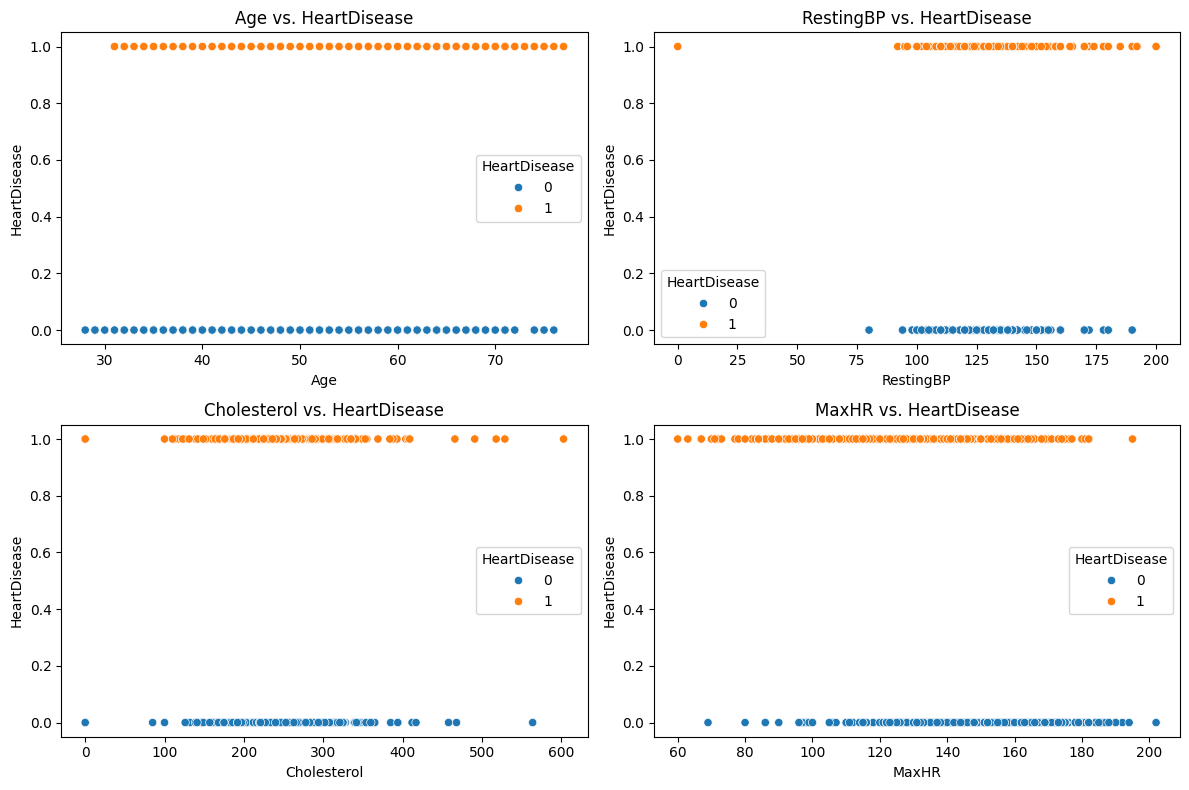

In [14]:
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(columns_to_plot):
    row = i // 2
    col_index = i % 2
    
    sns.scatterplot(data=df, x=col, y='HeartDisease', hue='HeartDisease', ax=axes[row, col_index])
    axes[row, col_index].set_title(f'{col} vs. HeartDisease')

plt.tight_layout()

plt.show()

In [15]:
df = df[(df['Age'] < 72) & (df['RestingBP'] > 95) & (df['Cholesterol'] > 100) & (df['Cholesterol'] < 450) & (df['MaxHR'] > 70) & (df['MaxHR'] < 180)]

<Axes: >

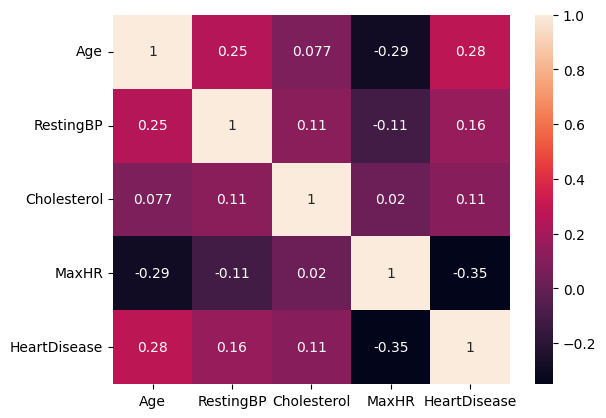

In [16]:
sns.heatmap(df.corr(), annot=True)

In [17]:
def logistic_regression(X, y):

  X = np.hstack((np.ones((X.shape[0], 1)), X))

  weights = np.zeros(X.shape[1])

  learning_rate = 0.00004
  num_iterations = 2000

  for i in range(num_iterations):
    z = np.dot(X, weights)
    sigmoid = 1 / (1 + np.exp(-z))
    gradients = np.dot(X.T, (sigmoid - y))
    weights -= learning_rate * gradients / X.shape[0]

  return weights

def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    weights = logistic_regression(X_train, y_train)
    predictions = 1 / (1 + np.exp(-np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), weights)))
    
    accuracy = np.mean(predictions.round() == y_test)
    print("Accuracy:", accuracy)

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

num_columns = X.shape[1]
for r in range(1, num_columns + 1):
    for cols in combinations(range(num_columns), r):
        print(f"Columns: {cols}")
        X_subset = X[:, cols]
        accuracy = train_test(X_subset, y)

Columns: (0,)
Accuracy: 0.45255474452554745
Columns: (1,)
Accuracy: 0.45255474452554745
Columns: (2,)
Accuracy: 0.45255474452554745
Columns: (3,)
Accuracy: 0.5474452554744526
Columns: (0, 1)
Accuracy: 0.656934306569343
Columns: (0, 2)
Accuracy: 0.583941605839416
Columns: (0, 3)
Accuracy: 0.7226277372262774
Columns: (1, 2)
Accuracy: 0.43795620437956206
Columns: (1, 3)
Accuracy: 0.6715328467153284
Columns: (2, 3)
Accuracy: 0.6277372262773723
Columns: (0, 1, 2)
Accuracy: 0.635036496350365
Columns: (0, 1, 3)
Accuracy: 0.7299270072992701
Columns: (0, 2, 3)
Accuracy: 0.6715328467153284
Columns: (1, 2, 3)
Accuracy: 0.6423357664233577
Columns: (0, 1, 2, 3)
Accuracy: 0.6861313868613139


In [19]:
df.drop(['Cholesterol'], axis = 1, inplace=True)

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

train_test(X,y)

Accuracy: 0.7299270072992701
